**Machine Learning Part One of Project**

Kylie Stephens

For the first part of the course project, we're focused on wrangling and EDA for your data.

There are a few possible situations:

The data aren't available yet: You need to scrape it over time, or need to get access (like the National Criminal Victimization Survey). Your submission will focus on the codebook or describing your plan for data gathering.
The data are available, but a major part of the project is getting them cleaned: Perhaps it's voting data from many sources covering many counties or precincts. Your submission will focus on some basic features of the data and your plan for cleaning.
The data are downloadable and clean: You're using something from Kaggle or Data.gov. Your submission will focus on summary statistics and visualizations that highlight the interesting variation in the dataset.
If you have clean data, write up the key variables and make some plots and descriptive statistics tables. If you have some but not all of the data, do some work on what you do have and explain how the pieces are going to fit together. If the data aren't available yet, write up what you expect to get and what challenges you expect to face in cleaning and preparing it for analysis.

A good submission will clearly address three questions:

1. What is in your data?

2. How will these data be useful for studying the phenomenon you're interested in?

3. What are the challenges you've resolved or expect to face in using them?

This is supposed to serve two purposes: Finish a quarter of your paper and act as a motivation to get your data and really start working with it. 

Suppose you don't have data or a plan yet. Well, there are some options:

1. Data.gov: Lots of great data on everything in the United States.

2. IPUMS: Microdata from around the world

3. SoundCloud, eBay, Zillow, etc.: If there's a company you find interesting, they might have an API that you can get data from

4. Energy Information Agency: Tons of environmental data out there

5. Challenge.gov, Kaggle.com: Look at the competitions, see if anything interests you

6. UCI Machine Learning Data Repo: If you use Kaggle or UCI, please pick something reasonably interesting

7. Scrape data: Especially if you're interested in sports, there are all kinds of data on webpages that can easily be scraped without subscribing to an API service

8. behavioral risk factor surveillance system from the CDC: Data about behavior and risk taking

The best datasets are the ones that have a clear variable to predict, and a bunch of variables that probably covary strongly with it, so you can build models that actually work

Please let me know if you have any questions!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Project Data/AnxietyDepression.csv')

In [4]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [95]:
df['Subgroup'].value_counts()

Subgroup
United States                      246
Hispanic or Latino                 246
18 - 29 years                      246
Bachelor's degree or higher        246
Some college/Associate's degree    246
                                  ... 
Cis-gender female                  132
Transgender                        132
Gay or lesbian                     132
Straight                           132
Bisexual                           132
Name: count, Length: 78, dtype: int64

Text(0.5, 0, 'Depression Score Value')

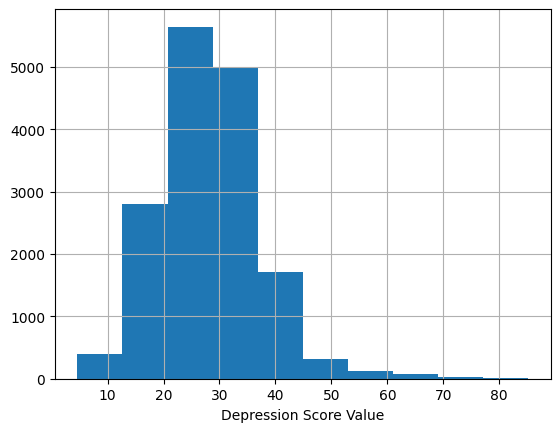

In [105]:
df['Value'].hist()
plt.xlabel("Depression Score Value")

In [102]:
df['Group'].value_counts()

Group
By State                      11016
By Age                         1722
By Race/Hispanic ethnicity     1230
By Education                    984
By Sex                          492
By Gender identity              396
By Sexual orientation           396
By Disability status            312
National Estimate               246
Name: count, dtype: int64

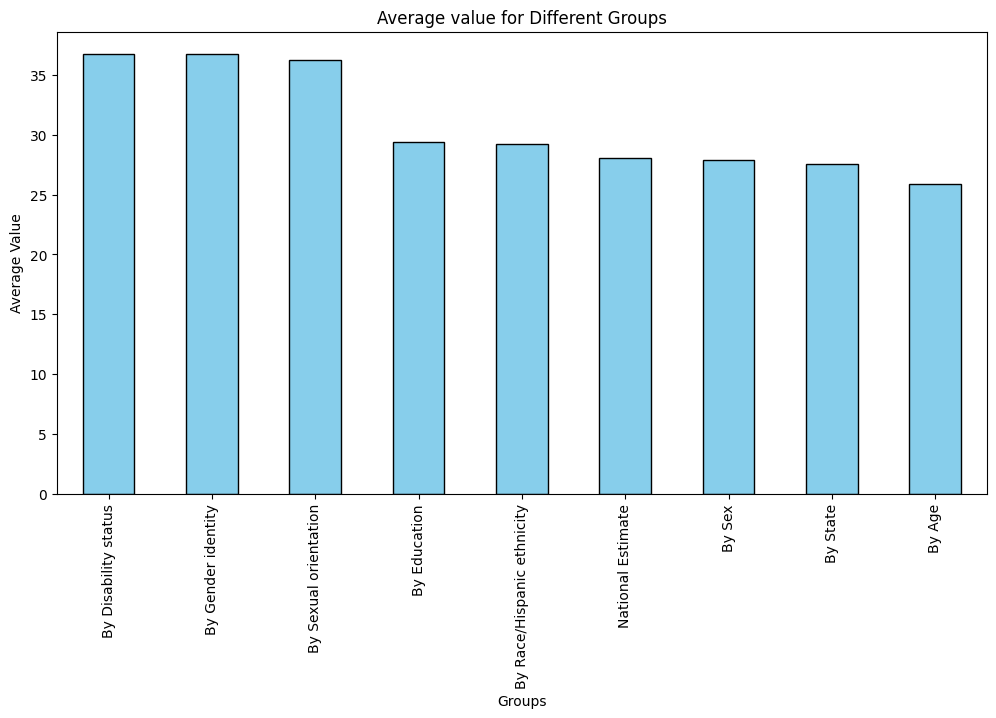

In [104]:
state_grouped = df.groupby('Group')['Value'].mean()

# Plotting the aggregated values by state
plt.figure(figsize=(12, 6))
state_grouped.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Formatting the plot
plt.xlabel('Groups')
plt.ylabel('Average Value')
plt.title('Average value for Different Groups')
plt.xticks(rotation=90)  # Rotate state labels for readability
plt.show()

In [5]:
print(df.columns.tolist())

['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date', 'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range']


In [6]:
df2 = pd.read_csv('./Project Data/Health.csv')

In [7]:
df2.head()

,OBJECTID,NAME,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.672329e+12,1.540832e+07
1,2,California,24.2,5.327809e+12,1.451870e+07
2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
3,4,Georgia,30.7,1.652980e+12,5.795596e+06
4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06


In [8]:
df3 = pd.read_csv('./Project Data/NutritionPhysicalActivity.csv')

In [9]:
df3.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [10]:
print(df3.columns.tolist())

['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']


In [11]:
braindf = pd.read_csv('./Project Data/brain_stroke.csv')

In [12]:
braindf.head()
#This looks like it has the most interesting variables so far

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Data Status?
This data is from Kaggle, and it is clean. Outliers and extremely rare categorical values have been dropped.

What is in the data?
- gender
- age
- hypertension
- heart disease
- marital status/history
- work type
- residence type
- average glucose level
- bmi
- smoking status/history
- if they have had a stroke

Why is this good for what we are looking for?

My group has not decided what exactly we want to analyze or what phenomenon we want to dive into within this dataset specifically, but we knew we wanted to do something related to medicine and factors/behaviors that may impact a certain disease or condition (in this case, the condition is whether or not an individual has had a brain stroke). This dataset has various variables that can be compared and contrasted to one another; additionally, variation within variables can be examined.

**Looking at Some of the Variables**

<Axes: >

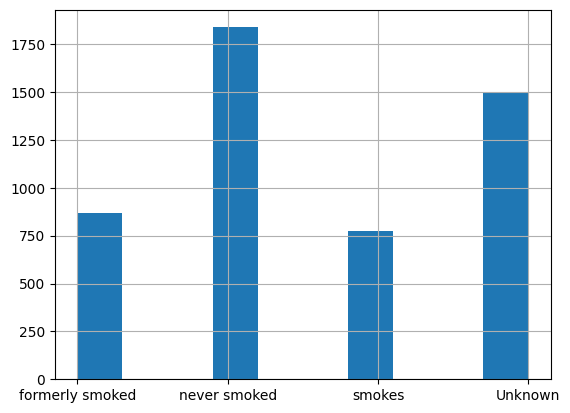

In [16]:
braindf['smoking_status'].hist()

<Axes: >

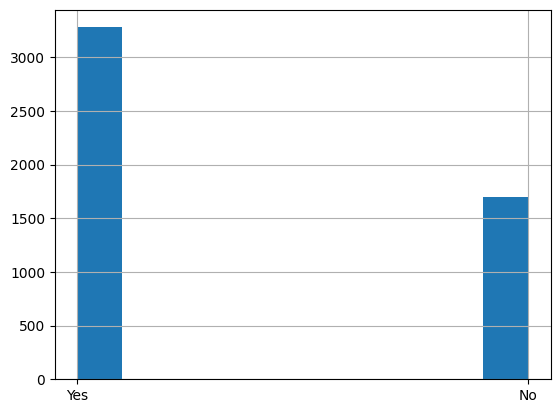

In [17]:
braindf['ever_married'].hist()

<Axes: >

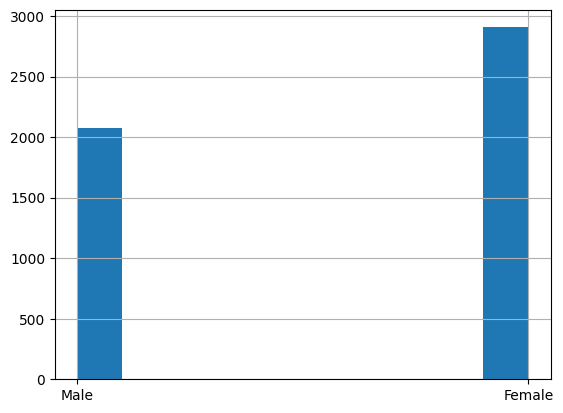

In [18]:
braindf['gender'].hist()

**Basic Math & Calculations**

In [21]:
stroke_positive = (braindf['stroke'] ==1).sum()
total_observations = (braindf['stroke'] ==braindf['stroke']).sum()

proportion_stroke_positive = (stroke_positive / total_observations) * 100
print('Proportion of Individuals in Dataset that had a Stroke: ', proportion_stroke_positive, '%')

Proportion of Individuals in Dataset that had a Stroke:  4.978919895603292 %


In [31]:
stroke_positive = braindf[braindf['stroke'] == 1]
bmi_observations = (stroke_positive['bmi'] >= 30).sum()
print("Number of stroke-positive patients with BMI ≥ 30:", bmi_observations)
stroke_positive_count = (braindf['stroke'] == 1).sum()
proportion = (bmi_observations / stroke_positive_count) *100
print("Percentage of stroke-positive patients with BMI ≥ 30:", proportion, '%')

Number of stroke-positive patients with BMI ≥ 30: 112
Percentage of stroke-positive patients with BMI ≥ 30: 45.16129032258064 %


*Note- A BMI of 30 or greater is considered obese.

In [34]:
HPT_observations = (stroke_positive['hypertension'] == 1).sum()
proportion2 = (HPT_observations / stroke_positive_count) *100
print("Percentage of stroke-positive patients with hypertension", proportion2, '%')

Percentage of stroke-positive patients with hypertension 26.61290322580645 %


In [37]:
HPTN_observations = (stroke_positive['hypertension'] != 1).sum()
HPTN_observations

np.int64(182)

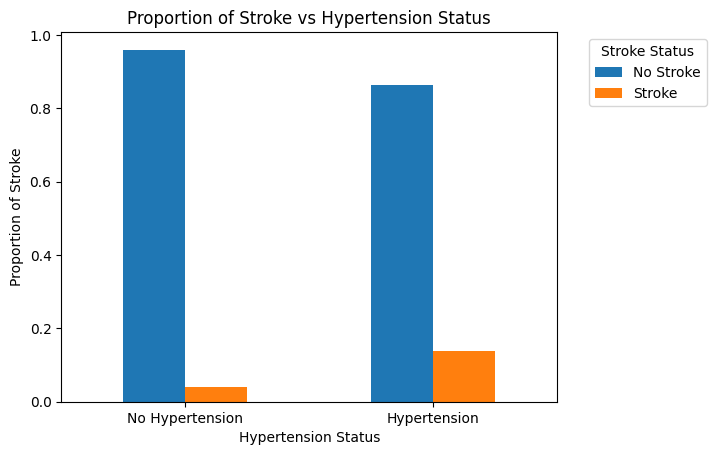

In [ ]:
hpt_stat = braindf.groupby(['hypertension', 'stroke']).size().unstack()

#normalize rows
hpt_stat = hpt_stat.div(hpt_stat.sum(axis=1), axis=0)


hpt_stat.index = ['No Hypertension', 'Hypertension']

#Bar Chart
hpt_stat.plot(kind='bar', stacked=False)

plt.xlabel('Hypertension Status')
plt.ylabel('Proportion of Stroke')
plt.title('Proportion of Stroke vs Hypertension Status')
plt.xticks(rotation=0)
plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'], bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

Text(0, 0.5, 'BMI')

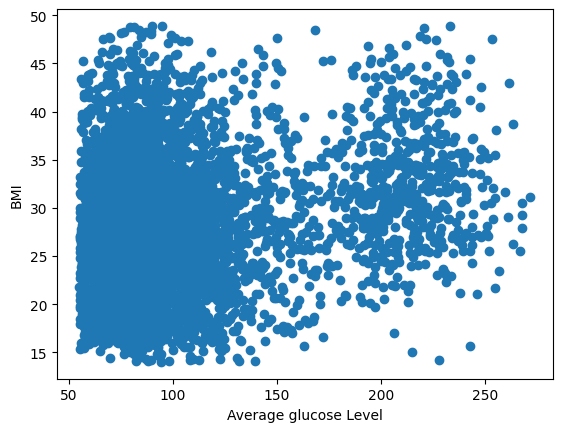

In [23]:
plt.scatter(braindf['avg_glucose_level'], braindf['bmi'])
plt.xlabel('Average glucose Level')
plt.ylabel('BMI')

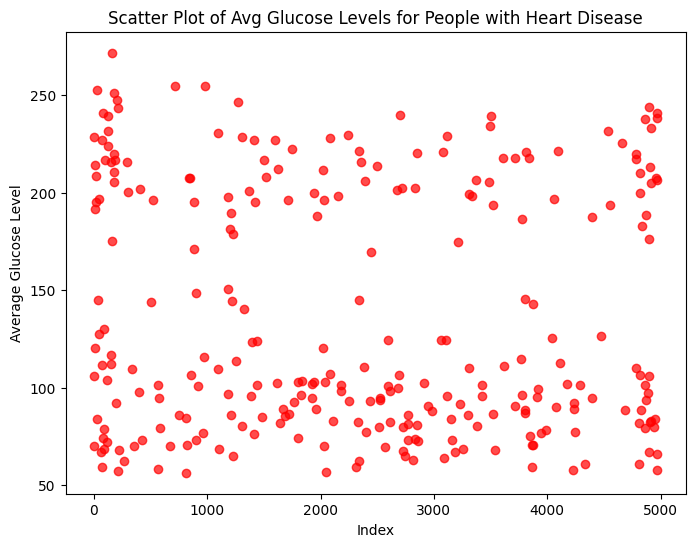

In [91]:

heart_disease_df = braindf[braindf['heart_disease'] == 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=heart_disease_df.index, y=heart_disease_df['avg_glucose_level'], 
            color='red', alpha=0.7)

# Formatting
plt.xlabel("Index")
plt.ylabel("Average Glucose Level")
plt.title("Scatter Plot of Avg Glucose Levels for People with Heart Disease")
plt.show()


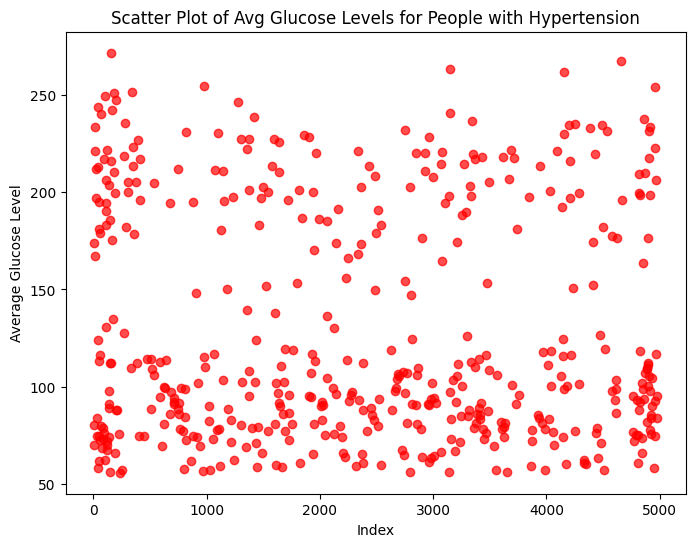

In [92]:
hypertension_df = braindf[braindf['hypertension'] == 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=hypertension_df.index, y=hypertension_df['avg_glucose_level'], 
            color='red', alpha=0.7)

# Formatting
plt.xlabel("Index")
plt.ylabel("Average Glucose Level")
plt.title("Scatter Plot of Avg Glucose Levels for People with Hypertension")
plt.show()

Text(0.5, 0, 'Age')

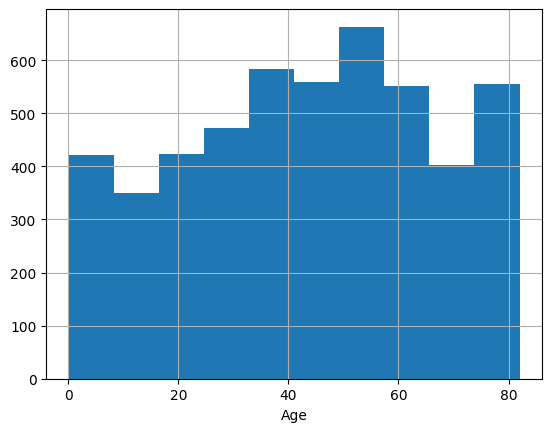

In [50]:
braindf['age'].hist()
plt.xlabel('Age')

In [53]:
older_people = (stroke_positive['age'] >= 60).sum()
elder_proportion =(older_people / stroke_positive_count) * 100
print('Percentage of People that had a stroke that were over the age of 60: ', elder_proportion, '%')

Percentage of People that had a stroke that were over the age of 60:  72.98387096774194 %


In [55]:
younger_people = (stroke_positive['age'] <= 20).sum()
younger_proportion =(younger_people / stroke_positive_count) * 100
print('Percentage of People that had a stroke that were under the age of 20: ', younger_proportion, '%')

Percentage of People that had a stroke that were under the age of 20:  0.8064516129032258 %


Text(0, 0.5, 'Number of People that had a Stroke')

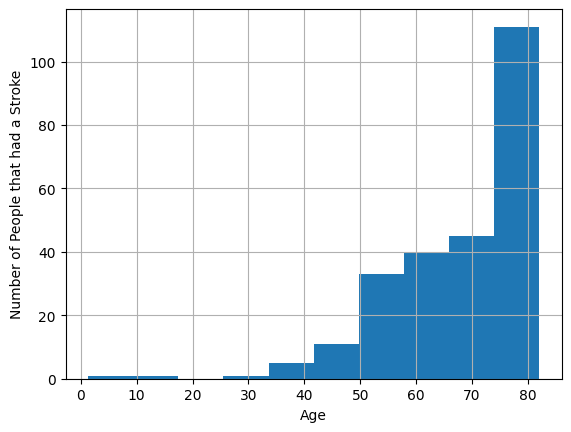

In [57]:
#Distribution Graph for Age
stroke_positive['age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of People that had a Stroke')

In [63]:
young_stroke_count = ((braindf['age'] < 20) & (braindf['stroke'] == 1)).sum()
print('Number of People Younger than 20 that had a stroke: ', young_stroke_count)


Number of People Younger than 20 that had a stroke:  2


These two people who had a stroke younger than age 20 should be removed for generic trend finding/analysis. These strokes defy the rest of the data (ie age, hypertension, obesity). They could have been caused by other diseases or conditions they were born with.

/var/folders/pk/1_27cr594ss_8ffd3wymy47c0000gq/T/ipykernel_63913/2927576735.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke_counts = braindf.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)


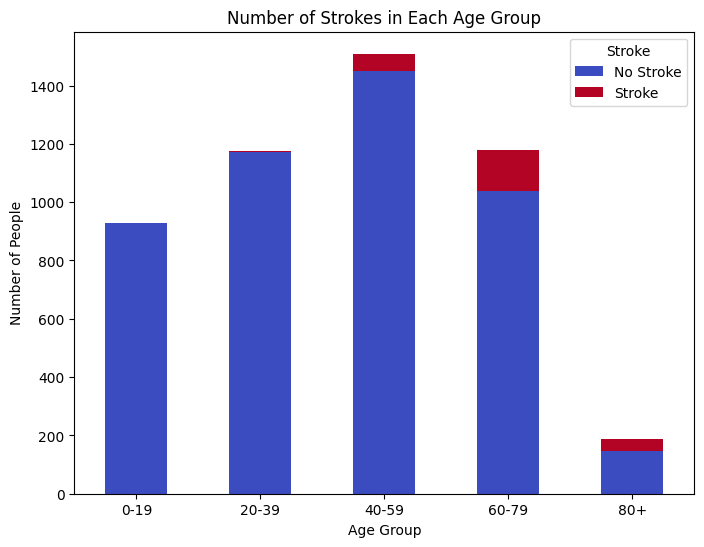

In [75]:
#Making age categories to clean up 
age_bins = [0, 20, 40, 60, 80, 100] #Age Ranges
age_labels = ['0-19', '20-39', '40-59', '60-79', '80+']
braindf['age_group'] = pd.cut(braindf['age'], bins=age_bins, labels=age_labels, right=False)

#Count how many people in each age group that had a stroke
age_stroke_counts = braindf.groupby(['age_group', 'stroke']).size().unstack(fill_value=0)

#Stacked bar chart
#Histodotplot was not an option for python 
age_stroke_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 6))

plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Number of Strokes in Each Age Group')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=0)

plt.show()


Another idea because I'm indecisive!

In [45]:
alzdf = pd.read_csv('./Project Data/ALZ.csv')

In [46]:
alzdf.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


What is in the data?

<Axes: >

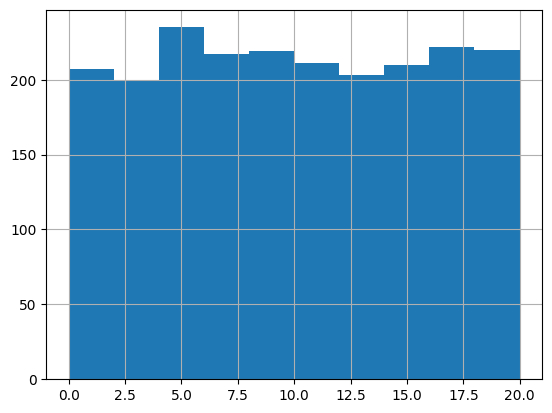

In [81]:
alzdf['AlcoholConsumption'].hist()
plt.xlabel('Alcohol Consumption')


This dataset is probably fake; alcohol distribution is most likely not uniformly distributed.

In [48]:
print(alzdf.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


Alzdf appears to be a made up data set. 

In terms of what exactly my group is exploring, we have not yet come to a consensus. However, we are looking into medical/health related factors. This ipynp shows some visualizations from datasets from both Kaggle and Data.gov. The first Kaggle dataset appears to be legitimate based on age distributions for stroke. 
The braindf and df (on depression and anxiety) are the two I find the most interesting because of the wider variety of variables. For example, in the depression and anxiety variable, and idea would be for a model to predict an individual's depression score given their symptoms in the past 7 days, their state, their age, their gender, etc. 
The same principle applies to predicting a stroke; however, I think this would be harder to do as the percentage of people that had a stroke in the dataset is less than 5%. 

Another idea I had was using GSS to create my own data set using variables and mess around with them. IE- if someone was raised with religion in their childhood or not and whether that affects who they vote for, if they believe in life after death, or their standpoint on certain issues. (There are more examples/options with that because there are so many variables on the site). 

Ultimately, I think creating a model with health/medicine related topic might be less of crafting or discovering something new, but more of confirming something already known but attempting to recreate those results with the specific data set we have. I am going to continue to mess around with the data and create one using GSS over the weekend to see what else I can find. This data is pretty clean, which was nice, but I think once we narrow down what phenomena we want to look into, it might be beneficial to drop certain columns and or get rid of pre-made binning.

Challenges encountered thus far:
- fake dataset :(
- making sure we do not just spit out something obvious (bad diet leads to higher bmi and health problems)
- having enough data to make a meaningful/confident model
- being decisive on an idea

Group Members: Margaux and Kieran